**Title : Identification of Quote Themes: A Multi-label Classification Problem**

**Group Members (Group No 20)**

Chandreen Ravihari Liyanage - 1158931

Sara Nazar - 1223124


Description-------------

This project utilize a dataset of two columns, quotes and list of tags as their themes. This is developed as a multi-label classification problem. First, several preprocessing steps, such as one-hot encoding, removing rows with non-alphanumeric characters, etc were perfromed. Then as the feature extraction techniques, TF-IDF, Word2Vec text embedding, and SentenceTransformers text embedding vectors were generated. Then scaling, and for dimentionality reduction - PCA were performed only on the TF-IDF feature vectors as text embedding vectors are often scaled and contain the most important limited features. As the classifiers, random forest, and KNN were used with the MultiOutputClassifier strategy. Accuracy, hamming loss, f1-score, precision, recall were used to evaluate the classification perfromance. As the performances were relatively low (mainly due to higher dimention in y label space), a technique called BinaryRelevance feature selection with chi-squared test was implemented. The main aim of this work is to identify the relavent themes of quotes while comparing the classification performances of different feature extraction techniques performed on different classifiers.

In [23]:
!pip install scikit-multilearn


In [24]:
!pip install sentence-transformers

In [25]:
!pip install wordcloud


In [26]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [27]:
#Mount on drive
# from google.colab import drive
# drive.mount('/content/gdrive')

In [28]:
# Setting the base path
# base_path =  "/content/gdrive/MyDrive/ML and NN/Project/Data"
base_path = "/kaggle/input/english-quotes"

In [29]:
import os
os.chdir(base_path)

In [30]:
import pandas as pd
import json
import csv
import numpy as np
import re
from nltk.corpus import stopwords

In [31]:
#read data file
df_quotes = pd.read_csv("quotes.csv");
df_quotes

,Unnamed: 0,quote,author,tags
0,0,“Be yourself; everyone else is already taken.”,Oscar Wilde,"['be-yourself', 'gilbert-perreira', 'honesty',..."
1,1,"“I'm selfish, impatient and a little insecure....",Marilyn Monroe,"['best', 'life', 'love', 'mistakes', 'out-of-c..."
2,2,“Two things are infinite: the universe and hum...,Albert Einstein,"['human-nature', 'humor', 'infinity', 'philoso..."
3,3,"“So many books, so little time.”",Frank Zappa,"['books', 'humor']"
4,4,“A room without books is like a body without a...,Marcus Tullius Cicero,"['books', 'simile', 'soul']"
...,...,...,...,...
2503,2995,“Morality is simply the attitude we adopt towa...,"Oscar Wilde,","['morality', 'philosophy']"
2504,2996,“Don't aim at success. The more you aim at it ...,"Viktor E. Frankl,","['happiness', 'success']"
2505,2997,"“In life, finding a voice is speaking and livi...",John Grisham,['inspirational-life']
2506,2998,"“Winter is the time for comfort, for good food...",Edith Sitwell,"['comfort', 'home', 'winter']"


In [32]:
#remove unnecessary columns
df_quotes = df_quotes.drop(['Unnamed: 0', 'author'], axis=1)

In [33]:
df_quotes.shape

(2508, 2)

In [34]:
df= df_quotes.copy()

## Pre-Processing ---------------------------------------------------------------------------------------------------------

Remove rows with non-alphanumeric characters

In [35]:
df = df[df['quote'].apply(lambda x: bool(re.search('[a-zA-Z0-9]', str(x))))]

# df = df[df['tags'].apply(lambda x: isinstance(x, list) and all(isinstance(tag, str) for tag in x))]

In [36]:
df.shape

(2503, 2)

Perform some simple cleaning operations

In [37]:
def clean_text(text: str):
    text = text.lower()
    text = text.strip()  # Remove extra spaces
    text = re.sub(r"[^\w\s]", "", text)  # Removed punctuations

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = text.split()
    words = [word for word in words if word.lower() not in stop_words]

    return ' '.join(words)

# def clean(df):
#   df["quote"] = df.quote.apply(lambda x: clean_text(x))
# clean(df)

# Apply the clean_text function to the 'quote' column
df['quote'] = df['quote'].apply(clean_text)

perfrom one-hot encode to convert labels into separate columns

In [38]:
import ast
from sklearn.preprocessing import MultiLabelBinarizer  #to convert the list of tags into binary form


df['tags'] = df['tags'].apply(ast.literal_eval)  #convert string representations of lists to actual lists


mlb = MultiLabelBinarizer()
tags_encoded = pd.DataFrame(mlb.fit_transform(df['tags']), columns=mlb.classes_, index=df.index)


df = pd.concat([df, tags_encoded], axis=1) # Concatenate the original dataframe with the encoded tags

# Drop the original 'tags' column as it is not needed anymore
df = df.drop('tags', axis=1)

In [39]:
df

,quote,1-corinthians-13,1929,1931,1955,1970,1993,1997,2008,2012,...,your-way,yourself,youth,youthfulness,zarek,zen,zeus,zoe-nightshade,zombies,zsadist
0,everyone else already taken,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,im selfish impatient little insecure make mist...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,two things infinite universe human stupidity i...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,many books little time,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,room without books like body without soul,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2503,morality simply attitude adopt towards people ...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2504,dont aim success aim make target going miss su...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2505,life finding voice speaking living truth origi...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2506,winter time comfort good food warmth touch fri...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Here we notice 2161 number of y columns. Need to reduce them. Within the machine learning model development section, a technique was implemented to reduce the y label space.

remove columns with meaningless labels


In [40]:
#As there are labels with only numbers and special characters, decided to remove them
#List of meaningful characters (excluding hyphen, because hyphen is within the labels)

meaningful_characters = set('abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ-')

columns_to_keep = [col for col in df.columns if any(char in meaningful_characters for char in col)]  #Filter out columns with labels that contain only meaningless characters

#Keep only the relevant columns
df = df[columns_to_keep]



In [41]:
df

,quote,1-corinthians-13,a-court-of-mist-and-fury,abe,abe-mazur,abilities,abraham-lincoln,absence,absurdities,academy,...,your-way,yourself,youth,youthfulness,zarek,zen,zeus,zoe-nightshade,zombies,zsadist
0,everyone else already taken,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,im selfish impatient little insecure make mist...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,two things infinite universe human stupidity i...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,many books little time,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,room without books like body without soul,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2503,morality simply attitude adopt towards people ...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2504,dont aim success aim make target going miss su...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2505,life finding voice speaking living truth origi...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2506,winter time comfort good food warmth touch fri...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Removing rows which do not have atleast one label (This is necessary because of the earlier step of removing nonalphanumeric columns)

In [42]:
#For each row, check if all label columns are zero (indicating no labels assigned)
rows_with_no_labels = df[df.iloc[:, 1:].sum(axis=1) == 0]


print("Number of rows with no labels:", len(rows_with_no_labels)) #View count and the rows with no labels

# print("Rows with no labels:")
# print(rows_with_no_labels)

Number of rows with no labels: 9


In [43]:
#Drop rows with no labels
df = df[df.iloc[:, 1:].sum(axis=1) > 0]

df.reset_index(drop=True, inplace=True) #Reset index after removing rows

In [44]:
df.shape

(2494, 2152)

Count the number of quotes for each label

In [45]:
counts = []
categories = list(df.columns.values)
for i in categories:
    counts.append((i, df[i].sum()))
df_stats = pd.DataFrame(counts, columns=['label', 'number_of_quotes'])
df_stats

# # Count the number of rows that belong to each label
# label_counts = df.iloc[:, 1:].sum(axis=0)

# print("Label Counts:")
# print(label_counts)

,label,number_of_quotes
0,quote,everyone else already takenim selfish impatien...
1,1-corinthians-13,1
2,a-court-of-mist-and-fury,3
3,abe,1
4,abe-mazur,1
...,...,...
2147,zen,2
2148,zeus,1
2149,zoe-nightshade,1
2150,zombies,1


In [46]:
df.shape

(2494, 2152)

Count the number of labels of each quote, and delete quotes having higher number of labels (Doing this to reduce the size of the dataset, as RAM space in execution environment crashes when perfroming y space feature engineering)

The maximum number of labels for a row in this dataset is: 36 which is too high and will lead to very low classification performances.

In [47]:
# df['Num_Labels'] = df.iloc[:, 1:].sum(axis=1)  # Count labels in each row
df = df.assign(Num_Labels=df.iloc[:, 1:].sum(axis=1))

#maximum label count occurred in a row
max_label_count = df.max()

threshold = 5
df= df[df['Num_Labels'] <= threshold] #Filter rows according to threshold

df = df.drop(columns=['Num_Labels'])

#Remove columns with no '1' values in the entire dataset
df = df.loc[:, (df != 0).any(axis=0)]


In [48]:
print(max_label_count)

quote                       âžthough nobody go back make new beginning any...
1-corinthians-13                                                            1
a-court-of-mist-and-fury                                                    1
abe                                                                         1
abe-mazur                                                                   1
                                                  ...                        
zeus                                                                        1
zoe-nightshade                                                              1
zombies                                                                     1
zsadist                                                                     1
Num_Labels                                                                 36
Length: 2153, dtype: object


In [49]:
df.shape

(2231, 1592)

In [50]:
# # delete the rows with only one class.

# label_counts = df.iloc[:, 1:].sum(axis=1)

# df = df[label_counts > 1]
# print("Shape after removing rows with only one label:", df.shape)
# print(df.shape)

# EDA

In [51]:
import matplotlib.pyplot as plt

Word Cloud analysis

In [52]:
from wordcloud import WordCloud

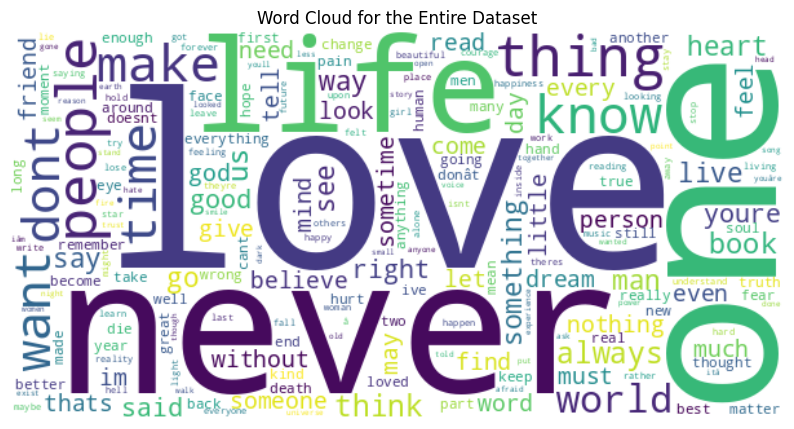

In [53]:
# Combine all quotes into a single string
all_quotes_text = ' '.join(df['quote'].astype(str))

# Generate the word cloud
wordcloud = WordCloud(width=600, height=300, background_color='white').generate(all_quotes_text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for the Entire Dataset')
plt.axis('off')
plt.show()

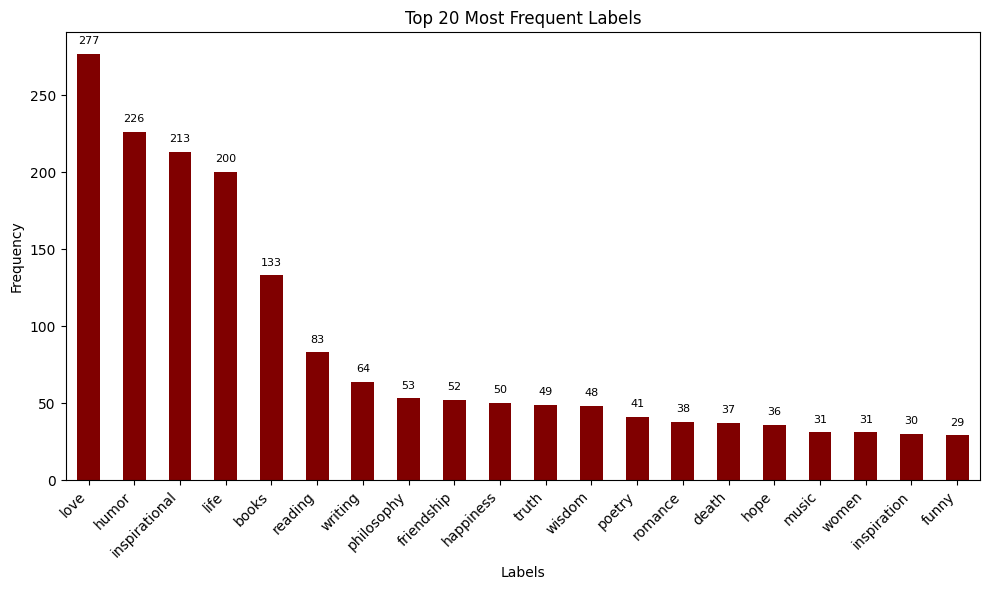

In [54]:
# As my dataframe contains an one-hot encoded dataset, Sum the occurrences of each label column to
# get the total count for each label
label_counts = df.iloc[:, 1:].sum(axis=0)

# Select the top 20 labels to visualize
top_n_labels = label_counts.nlargest(20)

plt.figure(figsize=(10, 6))
bar_plot = top_n_labels.plot(kind='bar', color='maroon')
plt.title('Top 20 Most Frequent Labels')
plt.xlabel('Labels')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')

# Annotate each bar with its count
for idx, value in enumerate(top_n_labels):
    bar_plot.text(idx, value + 5, str(value), ha='center', va='bottom', fontsize=8, color='black')

plt.tight_layout()
plt.show()

Analyzee the co-occurrence of labels. Create a co-occurrence matrix or heatmap to visualize which labels tend to appear together. This can help to understand relationships between different labels.

In [55]:
import seaborn as sns

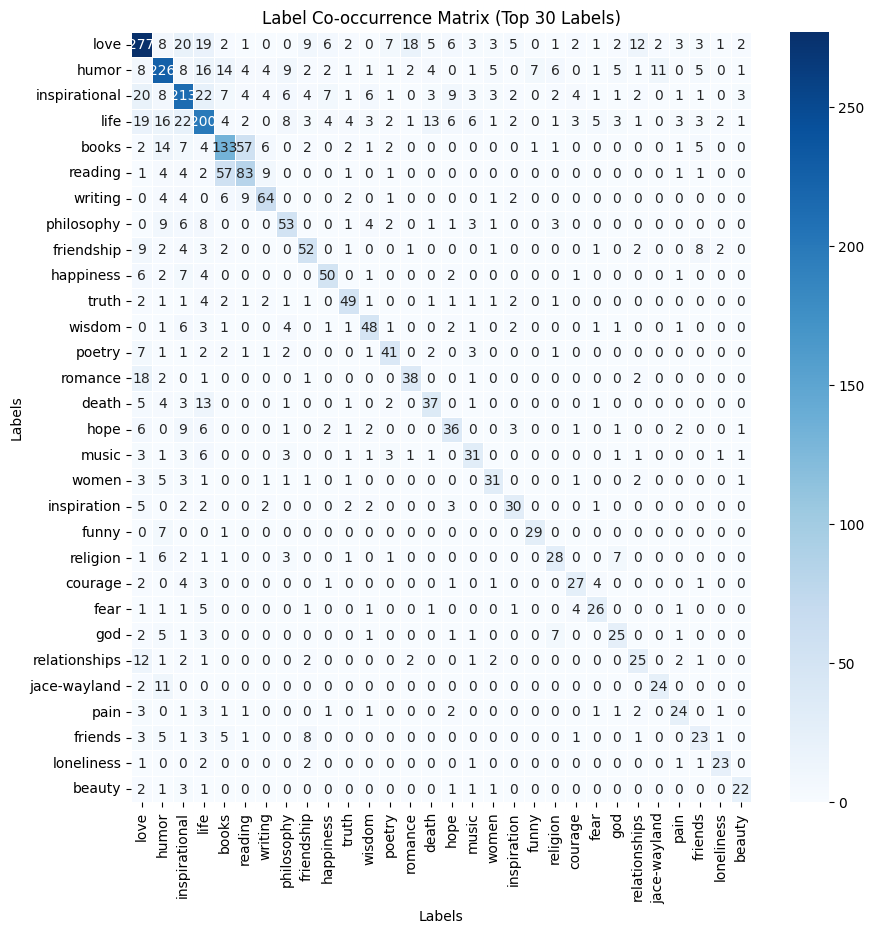

In [56]:
#Extract the label columns
label_columns = df.columns[1:]

# #Sum the occurrences of each label column to get the total count for each label
# label_counts = df[label_columns].sum(axis=0)

top_n_labels = label_counts.nlargest(30).index

subset_df = df[label_columns][top_n_labels]

#co-occurrence matrix for the selected labels
co_occurrence_matrix = subset_df.T.dot(subset_df)

#Plotting the heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(co_occurrence_matrix, cmap='Blues', annot=True, fmt='d', linewidths=.5)
plt.title('Label Co-occurrence Matrix (Top 30 Labels)')
plt.xlabel('Labels')
plt.ylabel('Labels')
plt.show()

Average number of labels per quote

In [57]:
#total number of labels per quote
df['num_labels'] = df[label_columns].sum(axis=1)

#average number of labels per quote
average_labels_per_quote = df['num_labels'].mean()

print(f'Average number of labels per quote: {average_labels_per_quote:.2f}')

Average number of labels per quote: 2.36


Average length of quotes

In [58]:
#length of each quote
df['quote_length'] = df['quote'].apply(lambda x: len(str(x).split()))

#average length of quotes
average_quote_length = df['quote_length'].mean()

print(f'Average length of quotes: {average_quote_length:.2f} words')

Average length of quotes: 14.34 words


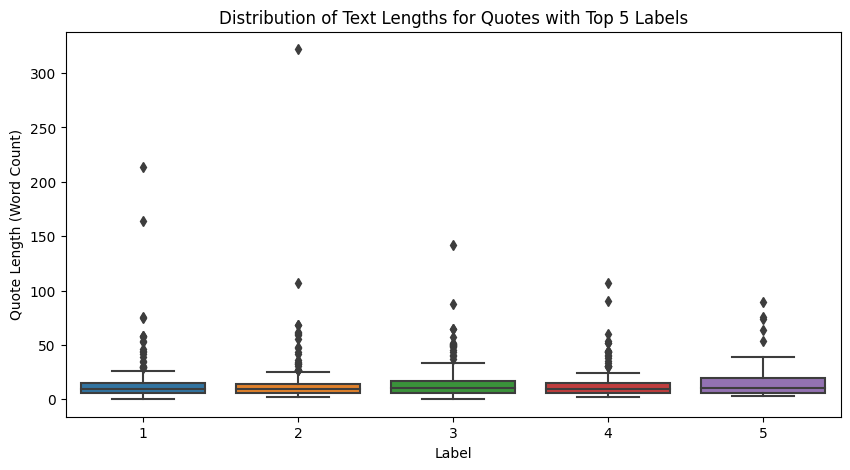

In [59]:
top_n_labels = label_counts.nlargest(5).index

subset_df = df[df[top_n_labels].sum(axis=1) > 0]

#Check thedistribution of text lengths for quotes with top labels
plt.figure(figsize=(10, 5))
sns.boxplot(x='num_labels', y='quote_length', data=subset_df)
plt.title('Distribution of Text Lengths for Quotes with Top 5 Labels')
plt.xlabel('Label')
plt.ylabel('Quote Length (Word Count)')
plt.show()


# Split dataset for training and testing

In [60]:
# Extract X and y
X = df['quote']
y = df.iloc[:, 1:]


In [61]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [62]:
X_train.shape

(1561,)

In [63]:
y_train.shape

(1561, 1593)

In [64]:
X_test.shape

(670,)

In [65]:
y_test.shape

(670, 1593)

## Feature Extraction ---------------------------------------------------------------------------------------



Text Vectorization (for 'quote' column)

# 1) Use TF-IDF for vectorization

In [66]:

from sklearn.feature_extraction.text import TfidfVectorizer


tfidf_vectorizer = TfidfVectorizer(max_features=300)  #max feature value if according to my choice

#for training set
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train).toarray()

#for testing set
X_test_tfidf = tfidf_vectorizer.fit_transform(X_test).toarray()

In [67]:
print(X_train_tfidf.shape)
print(X_test_tfidf.shape)

(1561, 300)
(670, 300)


# 2) Generate word embedding using Word2Vec

first tokenize sentence into words

In [68]:
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec


# Tokenize sentences
X_train_tokenized = [word_tokenize(quote) for quote in X_train]
X_test_tokenized = [word_tokenize(quote) for quote in X_test]

# Flatten the list of lists
flattened_X_train_tokenized = [word for sentence in X_train_tokenized for word in sentence]
flattened_X_test_tokenized = [word for sentence in X_test_tokenized for word in sentence]




generate vectors

In [69]:
# Word2Vec model
word2vec_model = Word2Vec(sentences=X_train_tokenized, vector_size=300, window=5, min_count=1, workers=4)

# Here I am checking if a word is present in the vocabulary before attempting to access its vector.
# This will solve the error when a word in the dataset is not present in the vocabulary of the Word2Vec model.
# Now, if a word is not present in the vocabulary, it returns a vector of zeros.

# training set
X_train_word2vec = np.array([word2vec_model.wv[quote] if quote in word2vec_model.wv else np.zeros(300) for quote in flattened_X_train_tokenized])

# testing set
word2vec_model = Word2Vec(sentences=X_test_tokenized, vector_size=300, window=5, min_count=1, workers=4)
X_test_word2vec = np.array([word2vec_model.wv[quote] if quote in word2vec_model.wv else np.zeros(300) for quote in flattened_X_test_tokenized])

In [70]:
print(X_train_word2vec.shape)
print(X_test_word2vec.shape)

(22283, 300)
(9781, 300)


# 3) Generate SentenceTransformer embedding

In [71]:
from sentence_transformers import SentenceTransformer

#Get pre-trained Sentence Transformers model
model_name = 'all-MiniLM-L6-v2'
model = SentenceTransformer(model_name)

In [72]:
#obtain sentence embeddings
X_train_sentence_embeddings = np.array(model.encode(X_train.tolist(), show_progress_bar=True))
X_test_sentence_embeddings = np.array(model.encode(X_test.tolist(), show_progress_bar=True))

print("X_train_sentence_embeddings shape:", X_train_sentence_embeddings.shape)
print("X_test_sentence_embeddings shape:", X_test_sentence_embeddings.shape)

Batches:   0%|          | 0/49 [00:00<?, ?it/s]

Batches:   0%|          | 0/21 [00:00<?, ?it/s]

X_train_sentence_embeddings shape: (1561, 384)
X_test_sentence_embeddings shape: (670, 384)


## Feature Engineering ------------------------------------------------------------------------------------------------------------

PCA for dimensionality reduction for TF-IDF vectors

PCA for Word2Vec, sentenceTransformer vectors will not be conducted. Normally these text embedding vectors are already densed.

In [73]:
from sklearn.decomposition import PCA

pca = PCA(n_components=200)  #number of features is my choice

#training set
X_train_tfidf_pca = pca.fit_transform(X_train_tfidf)

#testing set
X_test_tfidf_pca = pca.transform(X_test_tfidf)


Scaling TF-IDF dimentionality reduced vectors (embedding vectors are often normalized. so, not perfroming scaling)

In [74]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# scaler = StandardScaler()
# X_train_tfidf_scaled = scaler.fit_transform(X_train_tfidf_pca)
# X_test_tfidf_scaled = scaler.transform(X_test_tfidf_pca)


scaler = MinMaxScaler()
X_train_tfidf_scaled = scaler.fit_transform(X_train_tfidf_pca)
X_test_tfidf_scaled = scaler.fit_transform(X_test_tfidf_pca)

combine TF-IDF and Word2Vec feature vectors

In [75]:
# X_train_combined = np.concatenate((X_train_tfidf_scaled, X_train_word2vec_pca), axis=1)
# X_test_combined = np.concatenate((X_test_tfidf_scaled, X_test_word2vec_pca), axis=1)

# # Concatenate features
X_train_combined = np.concatenate((X_train_tfidf_scaled, X_train_sentence_embeddings), axis=1)
X_test_combined = np.concatenate((X_test_tfidf_scaled, X_test_sentence_embeddings), axis=1)


# Developing Classifiers ------------------------------------------

In [76]:
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, roc_auc_score, precision_recall_fscore_support
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, hamming_loss
from sklearn.multioutput import MultiOutputClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.datasets import make_multilabel_classification
from sklearn.feature_selection import SelectKBest, chi2
import gc

In [116]:
from scipy import sparse

def manual_accuracy_score(y_true, y_pred):
    # Convert to numpy arrays if they are Pandas DataFrames
    if isinstance(y_true, pd.DataFrame):
        y_true = y_true.to_numpy()
    if isinstance(y_pred, pd.DataFrame):
        y_pred = y_pred.to_numpy()

    # Check if all the predicted labels match the true labels for each sample
    exact_match = np.all(y_true == y_pred, axis=1)

    # Calculate the proportion of samples that have an exact match
    accuracy = np.mean(exact_match)
    return accuracy

def manual_hamming_loss(y_true, y_pred):
    # Convert sparse matrix to dense if necessary
    if sparse.issparse(y_true):
        y_true = y_true.toarray()
    if sparse.issparse(y_pred):
        y_pred = y_pred.toarray()

    # Convert to numpy arrays if they are Pandas DataFrames
    if isinstance(y_true, pd.DataFrame):
        y_true = y_true.to_numpy()
    if isinstance(y_pred, pd.DataFrame):
        y_pred = y_pred.to_numpy()

    return np.mean(np.not_equal(y_true, y_pred).astype(int))


def manual_precision_recall_fscore_support(y_true, y_pred, average='macro'):
    # Convert sparse matrix to dense if necessary
    if sparse.issparse(y_true):
        y_true = y_true.toarray()
    if sparse.issparse(y_pred):
        y_pred = y_pred.toarray()

    # Convert to numpy arrays if they are Pandas DataFrames
    if isinstance(y_true, pd.DataFrame):
        y_true = y_true.to_numpy()
    if isinstance(y_pred, pd.DataFrame):
        y_pred = y_pred.to_numpy()

    # Initialize sums for precision, recall, and F1
    precision_sum, recall_sum, f1_sum = 0, 0, 0
    n_labels = y_true.shape[1]

    for i in range(n_labels):
        # For each label, calculate true positives, false positives, false negatives
        tp = np.sum((y_true[:, i] == 1) & (y_pred[:, i] == 1))
        fp = np.sum((y_true[:, i] == 0) & (y_pred[:, i] == 1))
        fn = np.sum((y_true[:, i] == 1) & (y_pred[:, i] == 0))

        # Precision, Recall, and F1 for this label
        precision = tp / (tp + fp) if (tp + fp) > 0 else 0
        recall = tp / (tp + fn) if (tp + fn) > 0 else 0
        f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

        # Add to sums
        precision_sum += precision
        recall_sum += recall
        f1_sum += f1

    if average == 'macro':
        # Macro-average (average metrics across labels)
        precision_avg = precision_sum / n_labels
        recall_avg = recall_sum / n_labels
        f1_avg = f1_sum / n_labels
    elif average == 'micro':
        # Micro-average (aggregate the contributions of all classes)
        total_tp = np.sum((y_true == 1) & (y_pred == 1))
        total_fp = np.sum((y_true == 0) & (y_pred == 1))
        total_fn = np.sum((y_true == 1) & (y_pred == 0))
        precision_avg = total_tp / (total_tp + total_fp) if (total_tp + total_fp) > 0 else 0
        recall_avg = total_tp / (total_tp + total_fn) if (total_tp + total_fn) > 0 else 0
        f1_avg = 2 * (precision_avg * recall_avg) / (precision_avg + recall_avg) if (precision_avg + recall_avg) > 0 else 0

    return precision_avg, recall_avg, f1_avg

In [102]:
def run_models(X_train, X_test, y_train, y_test, classi):

  # Training the model. I used MultiOutputClassifier class for multi-label classifcation. Other approches
    # are OneVsRestClassifier() , BinaryRelevance()
  classifier = MultiOutputClassifier(classi).fit(X_train, y_train)

  #Predictions on the testing set
  y_pred = classifier.predict(X_test)

  #Evaluate performance
  print("Accuracy:", manual_accuracy_score(y_test, y_pred))
  print("Hamming Loss:", manual_hamming_loss(y_test, y_pred))

  precision, recall, f1 = manual_precision_recall_fscore_support(y_test, y_pred, average='micro')

  # test_pre = precision_score(y_test, pred_labels, average='macro')
  # test_re = recall_score(y_test, pred_labels, average='macro')
  # test_f1 = f1_score(y_test, pred_labels, average='macro')

  print("Precision:", precision)
  print("Recall:", recall)
  print("F1-Score:", f1)


  # print("\nClassification Report:\n", classification_report(y_test, y_pred))
  print("="*50)

  gc.collect() #clear RAM

In [111]:
def run_models2(X_train, X_test, y_train, y_test, classi):

  # Training the model. I used MultiOutputClassifier class for multi-label classifcation. Other approches
    # are OneVsRestClassifier() , BinaryRelevance()
  classifier = BinaryRelevance(classi).fit(X_train, y_train)

  #Predictions on the testing set
  y_pred = classifier.predict(X_test)
  

  #Evaluate performance
  print("Accuracy:", manual_accuracy_score(y_test, y_pred))
  print("Hamming Loss:", manual_hamming_loss(y_test, y_pred))

  precision, recall, f1 = manual_precision_recall_fscore_support(y_test, y_pred, average='micro')

  print("Precision:", precision)
  print("Recall:", recall)
  print("F1-Score:", f1)


  # print("\nClassification Report:\n", classification_report(y_test, y_pred))
  print("="*50)

  gc.collect() #clear RAM

In [98]:
knn = KNeighborsClassifier(n_neighbors=3);
rf = RandomForestClassifier();
mlp = MLPClassifier()

#Train and evaluate the models with TF-IDF feature vectors as inputs

multi-class classification with MultiOutputClassifie() class

In [106]:
#KNN
run_models(X_train_tfidf_scaled, X_test_tfidf_scaled, y_train, y_test, knn);


Accuracy: 0.0
Hamming Loss: 0.002637471774835802
Precision: 0.5038759689922481
Recall: 0.07593457943925233
F1-Score: 0.1319796954314721


In [107]:
#Random Forest
run_models(X_train_tfidf_scaled, X_test_tfidf_scaled, y_train, y_test, rf);

Accuracy: 0.0
Hamming Loss: 0.002542841348811498
Precision: 0.7914691943127962
Recall: 0.09472490073737946
F1-Score: 0.1691995947315096


In [108]:
#MLP
run_models(X_train_tfidf_scaled, X_test_tfidf_scaled, y_train, y_test, mlp);

/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptro

Accuracy: 0.0
Hamming Loss: 0.0027246067215710526
Precision: 0.36217948717948717
Recall: 0.06666666666666667
F1-Score: 0.11260587942202291


multi-class classification with BinaryRelevance() class

In [117]:
#KNN
run_models2(X_train_tfidf_scaled, X_test_tfidf_scaled, y_train, y_test, knn);


Accuracy: 0.0
Hamming Loss: 0.002637471774835802
Precision: 0.5038759689922481
Recall: 0.07593457943925233
F1-Score: 0.1319796954314721


In [118]:
#Random Forest
run_models2(X_train_tfidf_scaled, X_test_tfidf_scaled, y_train, y_test, rf);

Accuracy: 0.0
Hamming Loss: 0.002557832307389606
Precision: 0.8285714285714286
Recall: 0.08323765786452354
F1-Score: 0.1512780386019823


In [119]:
#MLP
run_models2(X_train_tfidf_scaled, X_test_tfidf_scaled, y_train, y_test, mlp);

/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptro

Accuracy: 0.0
Hamming Loss: 0.0027011833487927592
Precision: 0.38562091503267976
Recall: 0.06937095825984715
F1-Score: 0.11758844045839563


#Train and evaluate the models with SentenceTransformer embedding vectors as inputs

multi-class classification with MultiOutputClassifie() class

In [120]:
run_models(X_train_sentence_embeddings, X_test_sentence_embeddings, y_train, y_test, knn);


Accuracy: 0.004477611940298508
Hamming Loss: 0.0025850034198124255
Precision: 0.5489443378119002
Recall: 0.16598955310504934
F1-Score: 0.2549019607843137


In [121]:
run_models(X_train_sentence_embeddings, X_test_sentence_embeddings, y_train, y_test, rf);

Accuracy: 0.0
Hamming Loss: 0.002481940579587936
Precision: 0.9794871794871794
Recall: 0.10754504504504504
F1-Score: 0.19381024860476911


In [122]:
#MLP
run_models(X_train_sentence_embeddings, X_test_sentence_embeddings, y_train, y_test, mlp);

/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptro

Accuracy: 0.0029850746268656717
Hamming Loss: 0.002553147632833947
Precision: 0.5492341356673961
Recall: 0.14878482513337285
F1-Score: 0.23414179104477612


multi-class classification with BinaryRelevance() class

In [123]:
run_models2(X_train_sentence_embeddings, X_test_sentence_embeddings, y_train, y_test, knn);


Accuracy: 0.004477611940298508
Hamming Loss: 0.0025850034198124255
Precision: 0.5489443378119002
Recall: 0.16598955310504934
F1-Score: 0.2549019607843137


In [124]:
run_models2(X_train_sentence_embeddings, X_test_sentence_embeddings, y_train, y_test, rf);

Accuracy: 0.0029850746268656717
Hamming Loss: 0.0024941207334326482
Precision: 0.9841269841269841
Recall: 0.10484780157835401
F1-Score: 0.1895058583800306


In [125]:
#MLP
run_models2(X_train_sentence_embeddings, X_test_sentence_embeddings, y_train, y_test, mlp);

/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptro

Accuracy: 0.0029850746268656717
Hamming Loss: 0.0025419044139003664
Precision: 0.5645514223194749
Recall: 0.15302491103202848
F1-Score: 0.24078394773681758


## Combined TF-IDF and SentenceTransformer vectors

multi-class classification with MultiOutputClassifie() class

In [126]:
run_models(X_train_combined, X_test_combined, y_train, y_test, knn);


Accuracy: 0.0
Hamming Loss: 0.0026318501653690117
Precision: 0.5368421052631579
Recall: 0.08879860708067325
F1-Score: 0.15239043824701198


In [127]:
run_models(X_train_combined, X_test_combined, y_train, y_test, rf);

Accuracy: 0.0
Hamming Loss: 0.002502553147632834
Precision: 0.9940828402366864
Recall: 0.09523809523809523
F1-Score: 0.173823072943611


In [128]:
#MLP
run_models(X_train_combined, X_test_combined, y_train, y_test, mlp);

/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptro

Accuracy: 0.004477611940298508
Hamming Loss: 0.002563453916856396
Precision: 0.5547445255474452
Recall: 0.09173204586602293
F1-Score: 0.15743138270326257


multi-class classification with BinaryRelevance() class

In [129]:
run_models2(X_train_combined, X_test_combined, y_train, y_test, knn);


Accuracy: 0.0
Hamming Loss: 0.0026318501653690117
Precision: 0.5368421052631579
Recall: 0.08879860708067325
F1-Score: 0.15239043824701198


In [130]:
run_models2(X_train_combined, X_test_combined, y_train, y_test, rf);

Accuracy: 0.0
Hamming Loss: 0.0024950576683437802
Precision: 0.9946524064171123
Recall: 0.10437710437710437
F1-Score: 0.18892839004570847


In [ ]:
#MLP
run_models2(X_train_combined, X_test_combined, y_train, y_test, mlp);

/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


As the classification performances are very low, here I experiment with label space reduction technique; Binary Relevance with Feature Selection using Chi-squared test approach.

In [ ]:
#Selecting binary relevance y space features using Chi-squared test

class BinaryRelevanceWithFeatureSelection:
    def __init__(self, feature_selector, classifier):
        self.feature_selector = feature_selector

        self.classifier = classifier

    def fit(self, X, y):
        # Apply feature selection independently to each label
        X_selected = np.empty((len(X), 0))

        for i in range(y.shape[1]):
            feature_selector_i = self.feature_selector[i]
            # feature_i = self.feature_selector[i]
            X_selected_i = feature_selector_i.fit_transform(X, y[:, i])

            X_selected = np.concatenate([X_selected, X_selected_i], axis=1)

        # Fit the classifier
        self.classifier.fit(X_selected, y)

    def predict(self, X):
        #Apply feature selection to the input data and predict
        X_selected = np.empty((len(X), 0))
        for i in range(self.classifier.classes_.shape[0]):

            feature_selector_i = self.feature_selector[i]

            X_selected_i = feature_selector_i.transform(X)
            X_selected = np.concatenate([X_selected, X_selected_i], axis=1)

        #return the predictions
        return self.classifier.predict(X_selected)

In [ ]:
import gc

def run_featureSelection(X_train, X_test, y_train, y_test, classi):
    y_train_array = y_train.values
    y_test_array = y_test.values

    classifier = OneVsRestClassifier(classi)
    br_fs_model = BinaryRelevanceWithFeatureSelection([SelectKBest(chi2, k=50) for _ in range(y_train_array.shape[1])], classifier)
    br_fs_model.fit(X_train, y_train_array)
    y_pred = br_fs_model.predict(X_test)


    #Evaluate performance
    print("Accuracy:", manual_accuracy_score(y_test, y_pred))
    print("Hamming Loss:", manual_hamming_loss(y_test, y_pred))

    precision, recall, f1 = manual_precision_recall_fscore_support(y_test, y_pred, average='micro')

    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-Score:", f1)


    # print("\nClassification Report:\n", classification_report(y_test, y_pred))
    print("="*50)

    gc.collect() #clear RAM

TF-IDF

In [ ]:
run_featureSelection(X_train_tfidf_scaled, X_test_tfidf_scaled, y_train, y_test, knn);


In [ ]:
run_featureSelection(X_train_tfidf_scaled, X_test_tfidf_scaled, y_train, y_test, rf);

SentenceTransformers

In [ ]:
run_featureSelection(X_train_sentence_embeddings, X_test_sentence_embeddings, y_train, y_test, knn);


In [ ]:
run_featureSelection(X_train_sentence_embeddings, X_test_sentence_embeddings, y_train, y_test, rf);

Word2Vec

In [ ]:
run_featureSelection(X_train_word2vec,X_test_word2vec, y_train, y_test, knn);


In [ ]:
run_featureSelection(X_train_word2vec,X_test_word2vec, y_train, y_test, rf);

Unable to run feature selection. Program crashes due to utilizing all available RAM